In [2]:
#rishab Verma
#3rd July 2019
import keras
import tensorflow as tf
import matplotlib.pyplot as plt 

Using TensorFlow backend.


In [3]:
print(tf.__version__)

1.13.1


In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  82 187
   26   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0   0 179 240 237
  255 240 139  83  64  43  60  54   0   1]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0  58 239 222 234
  238 246 252 254 255 248 255 187   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   3   0   0 194 

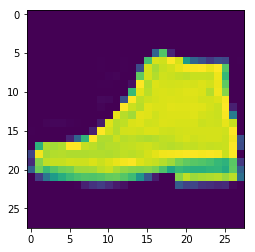

In [5]:
plt.imshow(train_images[42])
print(train_labels[42])
print(train_images[42])

In [6]:
#image values are from 0-255
#neural networks work with normalized data
train_images = train_images/255.0
test_images = test_images/255.0

In [7]:
# need 3 layers 
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)    
])

In [8]:
model.compile(optimizer = tf.train.AdamOptimizer(), loss = 'sparse_categorical_crossentropy')
model.fit(train_images, train_labels, epochs=10) 

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.4972
Epoch 2/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.3787
Epoch 3/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.3364
Epoch 4/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.3134
Epoch 5/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.2946
Epoch 6/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.2788
Epoch 7/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.2676
Epoch 8/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.2581
Epoch 9/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.2478
Epoch 10/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.2392


In [9]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 49us/step


0.3307131597280502

In [ ]:
#Rishab Verma 
#8th July 2019

#call back test 
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.6):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])